<a href="https://colab.research.google.com/github/Binaaa04/dataMining/blob/main/AssociateDataScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None

Cek missing value:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Statistik Deskriptif:
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.00000

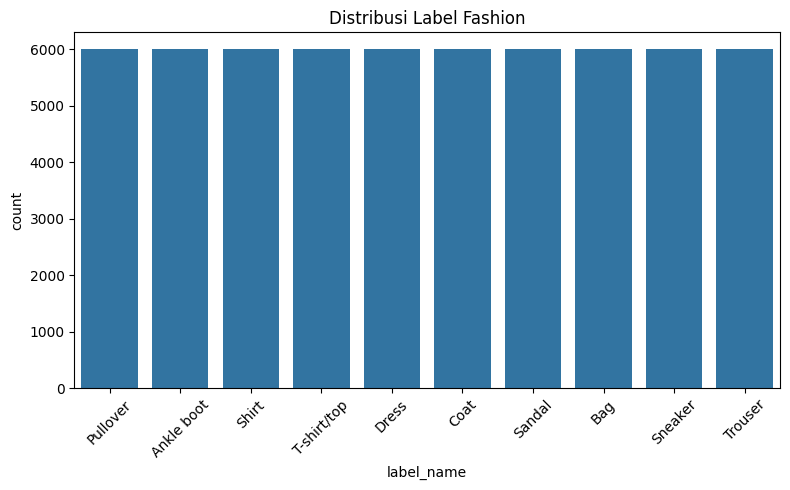

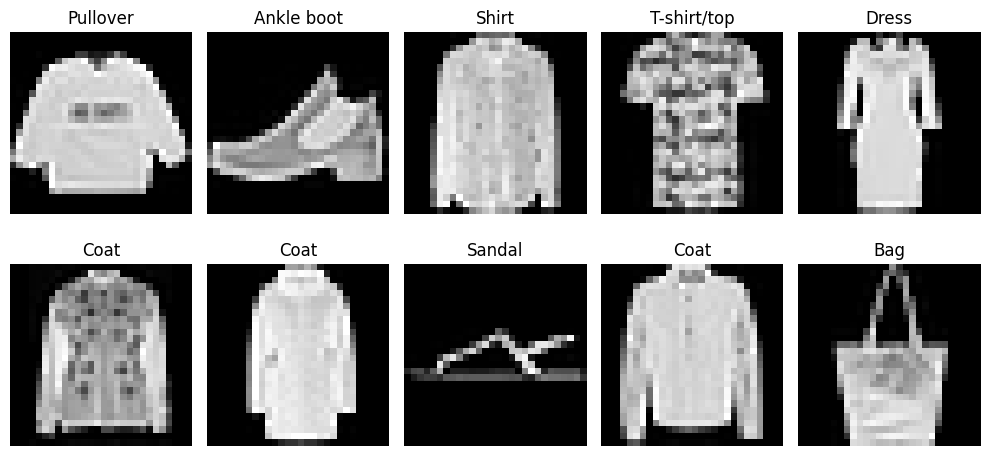


5 Piksel dengan Variansi Tertinggi:
pixel44     10728.191697
pixel41     10718.516920
pixel42     10550.993162
pixel43     10451.512989
pixel741    10304.677724
dtype: float64


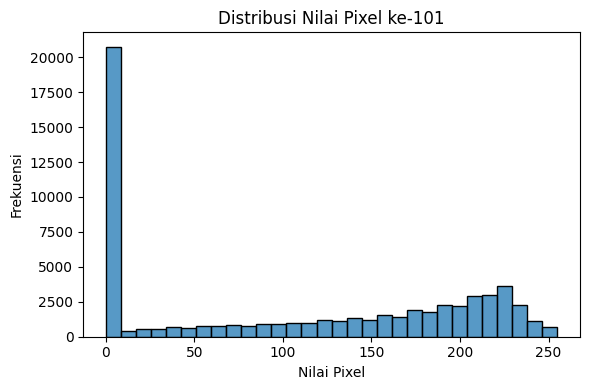

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
train = pd.read_csv('/content/drive/MyDrive/ADS/fashion-mnist_train.csv')

# 2. Cek struktur data
print("Struktur Data:")
print(train.info())

# 3. Cek data kosong
print("\nCek missing value:")
print(train.isnull().sum())

# 4. Statistik deskriptif
print("\nStatistik Deskriptif:")
print(train.describe())

# 5. Mapping label angka ke nama pakaian
label_map = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}
train['label_name'] = train['label'].map(label_map)

# 6. Visualisasi distribusi label
plt.figure(figsize=(8, 5))
sns.countplot(x='label_name', data=train, order=train['label_name'].value_counts().index)
plt.title('Distribusi Label Fashion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Tampilkan contoh 10 gambar pertama
pixel_columns = [col for col in train.columns if col.startswith('pixel')]
pixel_data = train[pixel_columns]

plt.figure(figsize=(10, 5))
for i in range(10):
    image = pixel_data.iloc[i].values.reshape(28, 28)
    label = train.iloc[i]['label']
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(label_map[label])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 8. Variansi antar pixel (top 5 pixel paling bervariasi)
pixel_variance = pixel_data.var().sort_values(ascending=False)
print("\n5 Piksel dengan Variansi Tertinggi:")
print(pixel_variance.head())

# 9. Histogram pixel acak (misal pixel ke-100)
plt.figure(figsize=(6, 4))
sns.histplot(pixel_data.iloc[:, 100], bins=30, kde=False)
plt.title("Distribusi Nilai Pixel ke-101")
plt.xlabel("Nilai Pixel")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()


In [13]:
# Preprocessing untuk Fashion MNIST (Versi Sederhana)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
train = pd.read_csv('/content/drive/MyDrive/ADS/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ADS/fashion-mnist_test.csv')

# 2. Cek data kosong
print("Cek missing value (train):")
print(train.isnull().sum())

print("\nCek missing value (test):")
print(test.isnull().sum())

# 3. Cek dimensi data
print("\nDimensi data train:", train.shape)
print("Dimensi data test :", test.shape)

# 4. Cek label unik
print("\nLabel unik pada train:", train['label'].unique())

# 5. Pisahkan fitur dan label
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

# 6. Normalisasi data pixel (0–255 menjadi 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 7. Tampilkan ringkasan hasil
print("\nData setelah dinormalisasi:")
print("Nilai minimum pixel (train):", X_train.min().min())
print("Nilai maksimum pixel (train):", X_train.max().max())

print("\nUkuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_test :", y_test.shape)


Cek missing value (train):
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Cek missing value (test):
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Dimensi data train: (60000, 785)
Dimensi data test : (10000, 785)

Label unik pada train: [2 9 6 0 3 4 5 8 7 1]

Data setelah dinormalisasi:
Nilai minimum pixel (train): 0.0
Nilai maksimum pixel (train): 1.0

Ukuran X_train: (60000, 784)
Ukuran y_train: (60000,)
Ukuran X_test : (10000, 784)
Ukuran y_test : (10000,)


Missing value (train):
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Akurasi: 0.8846

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.94      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.98      0.95      0.96      1000
           6       0.75      0.61      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     1000

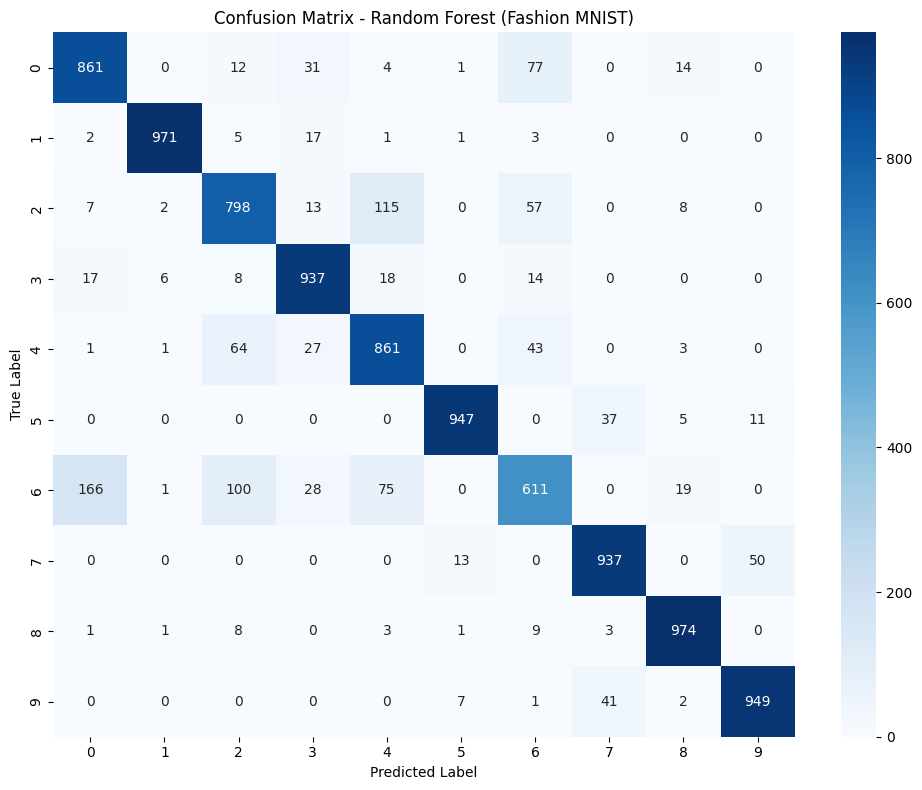

<Figure size 800x500 with 0 Axes>

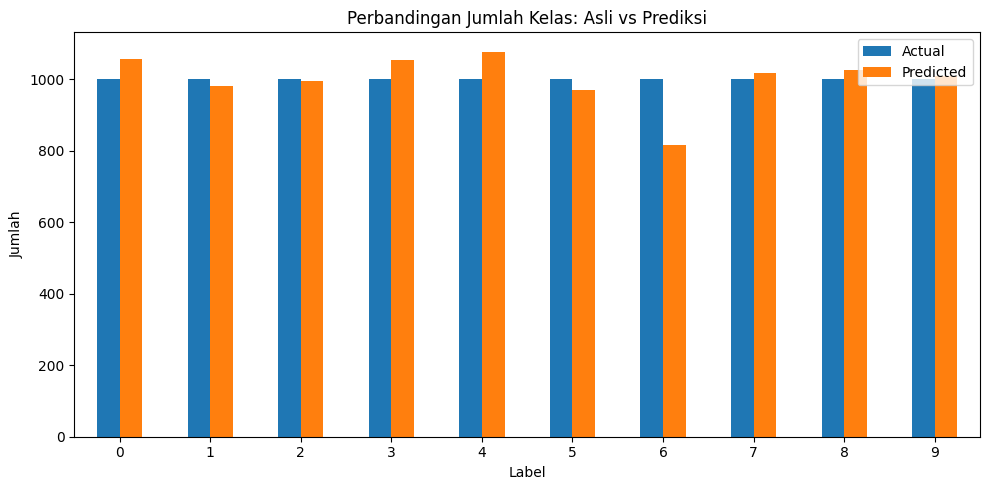

In [17]:
# === IMPORT LIBRARY ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# === LOAD DATA ===
train = pd.read_csv('/content/drive/MyDrive/ADS/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ADS/fashion-mnist_test.csv')

# === CEK MISSING VALUE ===
print("Missing value (train):")
print(train.isnull().sum())

# === PISAH FITUR DAN LABEL ===
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

# === NORMALISASI PIXEL (0–255 → 0–1) ===
X_train = X_train / 255.0
X_test = X_test / 255.0

# === LATIH MODEL KLASIFIKASI (Random Forest) ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === PREDIKSI ===
y_pred = model.predict(X_test)

# === EVALUASI MODEL ===
acc = accuracy_score(y_test, y_pred)
print("\nAkurasi:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === VISUALISASI CONFUSION MATRIX ===
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Fashion MNIST)')
plt.tight_layout()
plt.show()

# === VISUALISASI PERBANDINGAN JUMLAH KELAS ASLI VS PREDIKSI ===
plt.figure(figsize=(8, 5))
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

df_counts = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})
df_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Perbandingan Jumlah Kelas: Asli vs Prediksi')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

